<a href="https://colab.research.google.com/github/AnnJer/Practice_in_Data_Preprocessing/blob/master/cp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

%pylab inline

plt.style.use('default')
figsize(12, 9)

import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Ubuntu'

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

from matplotlib import rc
font = {'family': 'Vernada',
        'weight': 'normal',
        'size': 10}
rc('font', **font)
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [0]:
from google.colab import files

# uploaded = files.upload()


In [0]:
# uploaded_2 = files.upload()


Saving dev.tsv to dev.tsv


(10000, 182)

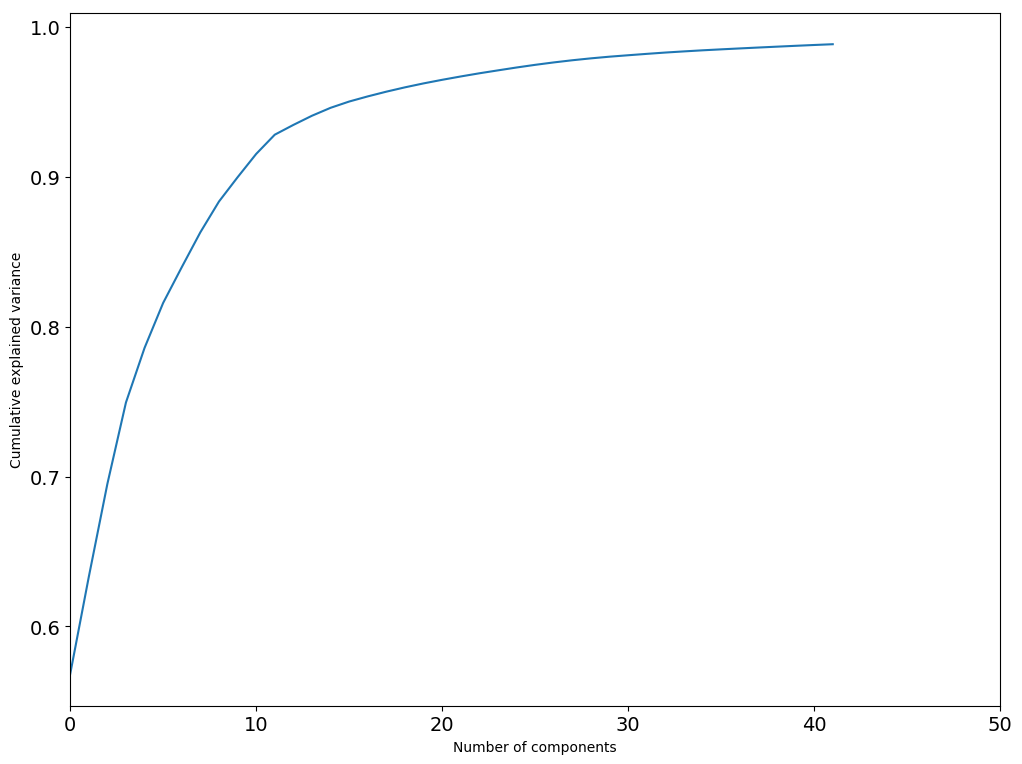

In [0]:
#загрузка данных
from sklearn.utils import shuffle
from sklearn.decomposition import PCA



train = pd.read_csv('train.tsv', sep='\t')
train = shuffle(train)
train = train[:10000]


#удаление выбросов
train[train.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

train_X = train.drop(['click', 'id'], axis=1)
train_y = train['click']


#использование метода главных компонент для сокращения числа признаков
pca1 = PCA(n_components = 42).fit(train_X)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlim(0,50,2)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

train_X.shape


In [0]:
XPCAreduced1 = pca1.fit_transform(train_X)
print(XPCAreduced1)

[[-9.96693076e-01 -1.07482059e+00  1.03430706e-01 ...  5.13715894e-02
  -3.21029358e-02 -9.76034210e-03]
 [ 1.74405098e+00  4.12052306e-01 -7.80933528e-01 ...  2.70730944e-02
   6.57437645e-04 -1.21083435e-03]
 [-8.63358520e-01  3.65486630e-01  4.99843877e-01 ...  4.29263132e-01
   6.69014582e-01 -3.31259951e-01]
 ...
 [-8.83431385e-01  5.38007190e-01  4.61454175e-01 ... -3.50148315e-02
   2.64452353e-02 -1.60801675e-02]
 [-9.16069953e-01  8.38360421e-01 -9.29279365e-02 ... -2.55304074e-02
   2.41070840e-02 -1.45937573e-02]
 [-9.82379112e-01 -1.04417001e-01  4.30581866e-01 ... -4.40700119e-02
   3.51043892e-02  7.30967078e-03]]


(3000, 182)

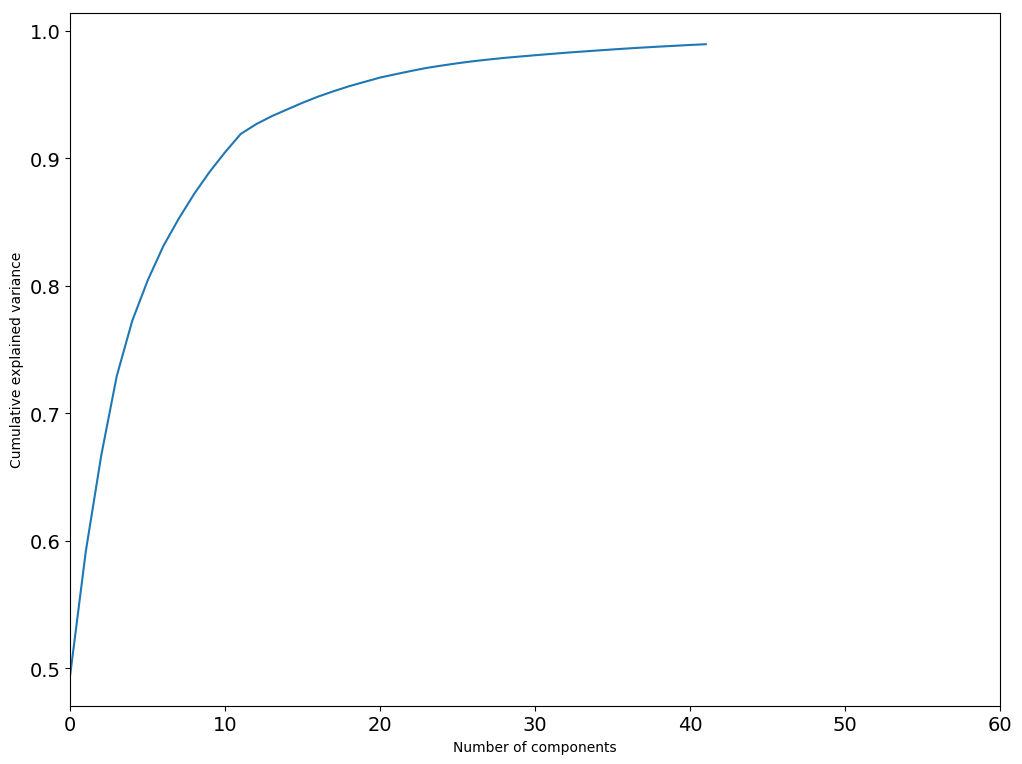

In [0]:
dev = pd.read_csv('dev.tsv', sep='\t')
dev = shuffle(dev)
dev = dev[:3000]

dev_X = dev.drop(['click', 'id'], axis=1)
dev_y = dev['click']

pca2 = PCA(n_components = 42).fit(dev_X)
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlim(0,60,2)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
dev_X.shape

In [0]:
XPCAreduced2 = pca2.fit_transform(dev_X)
print(XPCAreduced2)
print(dev_y.shape,
XPCAreduced2.shape)

[[-0.84647319  0.43447141  0.21205452 ... -0.05603352 -0.04466398
  -0.10108639]
 [-0.67584304 -0.97871061  0.04449007 ... -0.01291677 -0.0115609
  -0.02148411]
 [-0.67425002 -0.5161757   0.2341037  ... -0.03810691 -0.08101095
   0.06035176]
 ...
 [ 1.70834067  1.13326442 -0.96561131 ...  0.00628635  0.02091225
  -0.00657723]
 [-0.87505221  0.31275806 -0.66490516 ... -0.02949611 -0.02876968
   0.04513056]
 [ 1.99272202 -0.60573843 -0.0919393  ...  0.00330263 -0.02075207
  -0.02482859]]
(3000,) (3000, 42)


In [0]:
#Сбалансированность классов для треин и тест
print(train_y.mean(), dev_y.mean())

0.1433 0.513


In [0]:
#в train классы несбалансированны, следует использовать oversampling
from imblearn.over_sampling import SMOTE, RandomOverSampler

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(XPCAreduced1, train_y)

In [0]:
print (y_resampled.mean(), dev_y.mean())

0.5 0.513


In [0]:
test = pd.read_csv('test.tsv', sep='\t')
test_dropped = test.drop(['id'], axis = 1)

pca3 = PCA(n_components = 42).fit(test_dropped)
XPCAreduced3 = pca3.fit_transform(test_dropped)
XPCAreduced3.shape

(12760, 42)

In [0]:
from sklearn.svm import SVC  

gammas = [0.1, 1, 10, 100]
param_grid = { 'gamma' : gammas}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_resampled, y_resampled)



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [0]:
grid_search.best_score_

0.7768180226450333

In [0]:
clf = SVC(**grid_search.best_params_)
clf.fit(X_resampled, y_resampled) 
y_pred = clf.predict(XPCAreduced2)
print(metrics.accuracy_score(dev_y, y_pred))

0.49566666666666664


In [0]:
from sklearn.naive_bayes import BernoulliNB

clf1 = BernoulliNB()
clf1.fit(X_resampled, y_resampled)
y_pred = clf1.predict(XPCAreduced2)
print(metrics.accuracy_score(dev_y, y_pred))

0.5253333333333333


In [0]:
parameters = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150]
              }
clf = GridSearchCV(GradientBoostingClassifier(), parameters, 
                   cv=10, 
                   scoring='roc_auc',
                   verbose = 3, 
                   n_jobs=10)
best_params_GBC = {'learning_rate':0.05, 'max_depth':4, 'min_samples_leaf':100}

clf.fit(XPCAreduced1, train_y)
print(clf.best_score_, clf.best_params_)
print(clf.best_params_)

# model_GBC = GradientBoostingClassifier

#  learning_rate=0.05, max_depth=4, min_samples_leaf=100, score=0.8033706952566602, total=  49.8s

In [0]:
from sklearn.ensemble import RandomForestClassifier


tree = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8]}


tree_grid = GridSearchCV(tree, param_grid,
                         cv=5, n_jobs=-1)

tree_grid.fit(XPCAreduced1, train_y)
tree_grid.best_score_

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(**tree_grid.best_params_)
rf.fit(X_resampled, y_resampled)
y_pred = rf.predict(XPCAreduced2)
print(metrics.accuracy_score(dev_y, y_pred))

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(**tree_grid.best_params_)
rf.fit(XPCAreduced1, train_y)
run(rf, XPCAreduced2, dev_y, 'rf')

rf AUC-ROC  = 0.4584132953345662


In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(**best_params_GBC)
gb.fit(XPCAreduced1, train_y)
run(gb, XPCAreduced2, dev_y, 'gb')

In [0]:
# uploaded_3 = files.upload()

Saving test.tsv to test.tsv


In [0]:
test = pd.read_csv('test.tsv', sep='\t')
test_dropped = test.drop(['id'], axis = 1)

pca3 = PCA(n_components = 42).fit(test_dropped)
XPCAreduced3 = pca3.fit_transform(test_dropped)
XPCAreduced3.shape

(12760, 42)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


k_range = range(1,10, 1)
weight_options = ["uniform", "distance"]

knn = KNeighborsClassifier()

param_grid = dict(n_neighbors = k_range
, weights = weight_options)

grid = GridSearchCV(knn, param_grid, cv=10, scoring="roc_auc")

grid.fit(dev_X, dev_y)
best_params = grid.best_params_

print(grid.best_score_, grid.best_params_)
#0.7160267462728298 -without pca
#0.6887304360193786 - pca (30)
#0.7095062090838826 - pca(40)
#0.7137689318338368 - pca (42)

0.7074605366707358 {'n_neighbors': 8, 'weights': 'uniform'}


In [0]:
from sklearn import metrics

knn = KNeighborsClassifier(**grid.best_params_) #**grid.best_params_
knn.fit(X_resampled, y_resampled)
y_pred = knn.predict(XPCAreduced2)
print(metrics.accuracy_score(dev_y, y_pred))

prediction = knn.predict_proba(XPCAreduced3)

0.5233333333333333


In [0]:

results_df = pd.DataFrame(data={'id':list(test['id']), 'target0':prediction[:,0], 'tardet1':prediction[:,1]})
file = results_df.to_csv('result.csv', index=False)
files.download('result.csv') 